# MarsToday: evaluating Mars climate through REMS sensor onboard Curiosity Mars rover - DATA VISUALIZATION

At this point, one might think why was import to extract data from NOAA. The data itself from Mars doesn't give many information unless it's compared with the conditions on Earth.

Thus, the coordinates from the Gale crater were extrapolated on Earth. The twin location on our planet is next to Papua New Guinea (5º south from the equator)

<img src="../images/Papua.png" width="500">

Info about temperature and pressure were related an visualized using Plotly.

# Import box

In [1]:
from Functions import *

# CSV call

In [2]:
mars = pd.read_csv("../data/mars-weather-cleaned.csv")

In [3]:
earth = pd.read_csv("../data/papua-weather-cleaned.csv")

In [4]:
widget = pd.read_csv("../data/widget-cleaned.csv")

## Data description

In [5]:
mars.describe()

,Sol,Month,Min_temp,Max_temp,Pressure,Mean_temp
count,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,1007.930306,3.872228,-76.121050,-12.510445,841.066417,-44.315747
std,567.879561,2.720768,5.504098,10.699454,54.253226,7.773096
min,1.000000,1.000000,-90.000000,-35.000000,727.000000,-60.500000
25%,532.250000,1.000000,-80.000000,-23.000000,800.000000,-51.500000
50%,1016.500000,3.000000,-76.000000,-11.000000,853.000000,-43.500000
75%,1501.750000,6.000000,-72.000000,-3.000000,883.000000,-37.500000
max,1977.000000,9.000000,-62.000000,11.000000,925.000000,-28.500000


The import variables are temperature, pressure and opacity. The maximum temperature recorded is 11 ºC, the minimum temperature is -90 ºC and the mean value is -76 ºC.
The maximum pressure recorded is 925 Pa, the minimum is 727 Pa and the average is 841 Pa.
99.8% of the days were sunny.

In [6]:
earth.describe()

,Max_temp,Min_temp,Pressure,Mean_temp
count,1755.000000,1755.000000,1755.000000,1755.000000
mean,30.881197,24.168471,100876.706553,27.162621
std,1.562836,1.296352,206.931433,1.239291
min,24.000000,15.000000,100290.000000,22.800000
25%,30.000000,23.722222,100730.000000,26.400000
50%,31.000000,24.000000,100880.000000,27.200000
75%,32.000000,25.000000,101010.000000,28.000000
max,35.111111,27.500000,101520.000000,31.300000


By plotting the temperatures we could obtain the temperature profile on Mars.

# Evaluating Mars climate

In [11]:
# Prepare subplots grid
cool_plots()

C:\Users\Carles\anaconda3\envs\Ironhack\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Temperature profiles

Please remember, the third planet from the Sun have a very thin atmosphere, approximately 100 times less dense than ours. This fact has direct implications on the surface temperature: without magnetic field or atmosphere to thermoregulate and distribute heat, the planet has to deal of temperatures from -30 ºC to -60 ºC. Meanwhile on Earth, the range of temperatures is much warmer and less prominent as on Mars.

Take also a closer look to the subtle shift from Papua New Guinea. Since 2016, the temperature baseline has been displaced upwards! Could be an indicative of an anomaly, such as climate change. On the other hand, the temperature pattern on Mars remains constant, with very little deviations from one year to another. This can give us the key to predict future values beyond 2018.

## Pressure profiles

It is impossible to not realize the weird pattern on Mars, which has no common points with Earth's. Why so?

According to J.A.Rodríguez-Manfredi et al. on their paper published in JGR Planets, "Mars Surface Pressure Oscillations as Precursors of Large Dust Storms Reaching Gale" (DOI: https://doi.org/10.1029/2021JE007005), Martian dust storms strongly interfere with global circulation patterns and change the diurnal and semidiurnal pressure variability as well as oscillations with periods greater than one sol associated with planetary waves. The specific pressure oscillations preceding each storm period are likely to be signatures of the large-scale circulation patterns that enable the growth and propagation of the storm fronts.

Another paper from N. Rennó et al., titled "Pressure observations by the Curiosity rover: Initial results" (DOI: https://doi.org/10.1002/2013JE004423) suggest that it is possible to witness atmospheric features at various spatial and temporal scales, e.g., the gradually increasing pressure due to the advancing Martian season, diurnal tides, thermal vortices, and other local atmospheric phenomena.

## Pressure vs Temperature

Pressure and Temperature are strictly related, being directly proportional: the more temperature, the more pressure. That is why when meteorologists anounce anticyclones (regions of the atmosphera with high of high pressure) the temperatures increase.

Some kind of direct proportion can be seen on Earth, with all the values distributed along the X and Y axis. However, this phenomena cannot be seen on Mars, leaving a "hole" where certain values of Pressure and Temperature can not coexist.

Solar heating on the day side and radiative cooling on the night side of a planet can induce pressure difference. Thermal tides, which are the wind circulation and waves driven by such a daily-varying pressure field, can explain a lot of variability of the Martian atmosphere. Compared to Earth's atmosphere, thermal tides have a larger influence on the Martian atmosphere because of the stronger diurnal temperature contrast. The surface pressure measured by Mars rovers showed clear signals of thermal tides, although the variation also depends on the shape of the planet's surface and the amount of suspended dust in the atmosphere.The atmospheric waves can also travel vertically and affect the temperature and water-ice content in the middle atmosphere of Mars.

<img src="../images/DustStorms2.gif" width="500">

Mars before and after a sandstorm

# "MarsToday": a mini tool to predict the temperature of Mars beyond the given dataset

As seen before, the temperature and pressure profiles, although being very abrupt, are very stable. This can allow anyone to extrapolate the values and predict the data.

Disclaimer: REMS is currently active and has been reporting weather data until the present day. Newer data can be obtained from the Planetary Data System from NASA (https://pds.nasa.gov/). The purpose of this process is to practice unknown habilities.

MarsToday() function works as follows: an user inputs a given date beyond 2018-02-28 in the format YYYY-MM-DD. MarsToday calls the scrapped database on CAB/REMS "widget" and the initial database "mars", looks for the date on both places and retrieves all the measurements made in years before, but same month and day. Then, the data is stored in a dataframe with Pandas and a series of basic statistics are performed: sums up all values and shows to average values and the standard deviation. The values are the extrapolation of the weather given a future date.

Once the prediction is made, MarsToday calls "widget" database again and shows the information of the given information.

By comparing the two outputs, the user can realize of the approximation was good enough or not.

As a bonus (and for a cooler effect), the minitool calls NASI API by the two functions "get_pictures_Curiosity" and "call_NASA" and looks for all images taken from any camera onboard Curiosity rover in the selected date.

Below you can call the MarsToday function:

LOADING..........

COMPLETE

WELCOME TO THE MARS ENVIRONMENTAL CONDITIONS PREDICTOR!

Please input a date in the following format YYYY-MM-DD from 2018-03-01: 
2020-01-01
This is my forecast for the selected date:



,Min_temp,Max_temp,Mean_temp,Pressure,MinT StDev,MaxT StDev,MeanT StDev,Press StDev,Atmo_opacity
0,-75.6,-11.3,-43.4,865.3,8.0,11.6,9.6,47.6,Sunny


The real conditions are: 



,Earth Date,Sol,Month,Min_temp,Max_temp,Pressure,Atmo_opacity,Season,Mean_temp
947,2020-01-01,2632,5,-76.0,-13.0,732.0,Sunny,Spring,-44.5


Wanna see cool pictures that Curiosity took from that day? :)



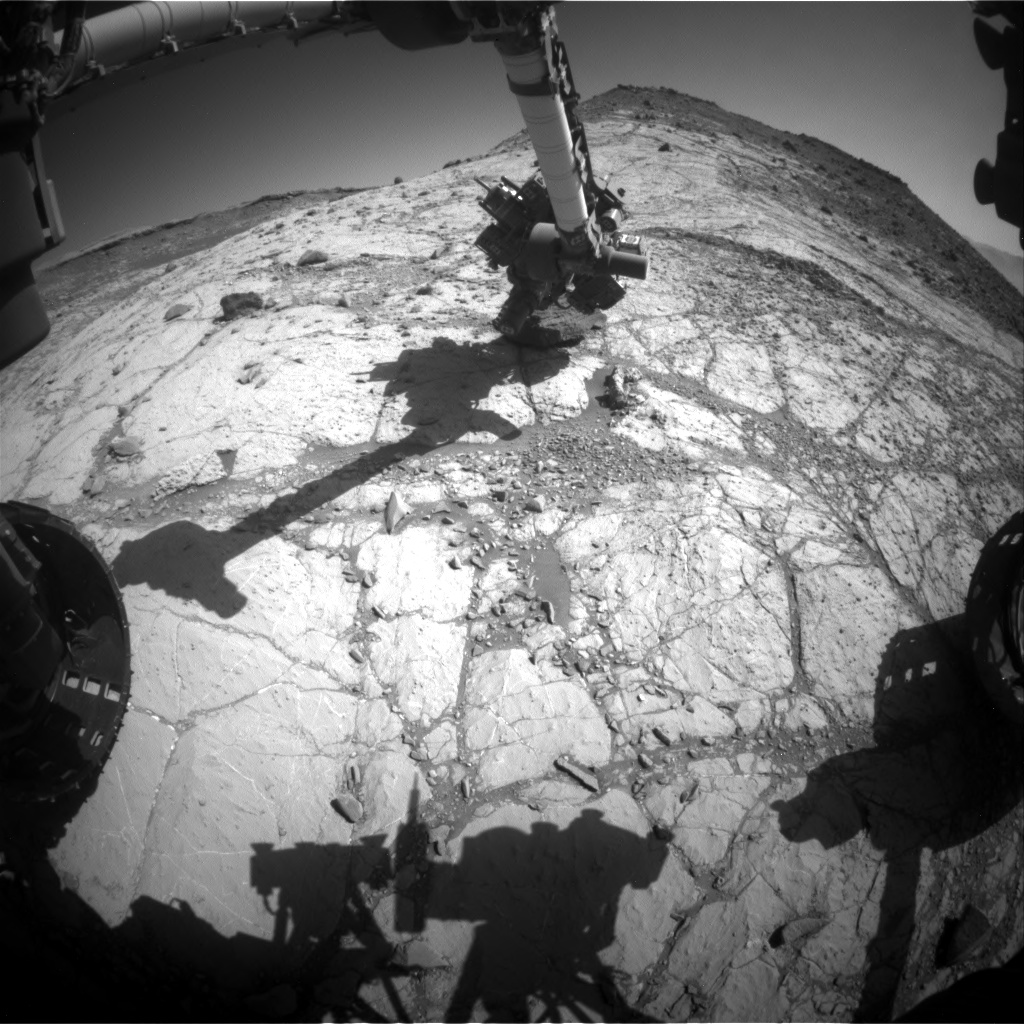

Image available for camera FHAZ onboard Curiosity rover


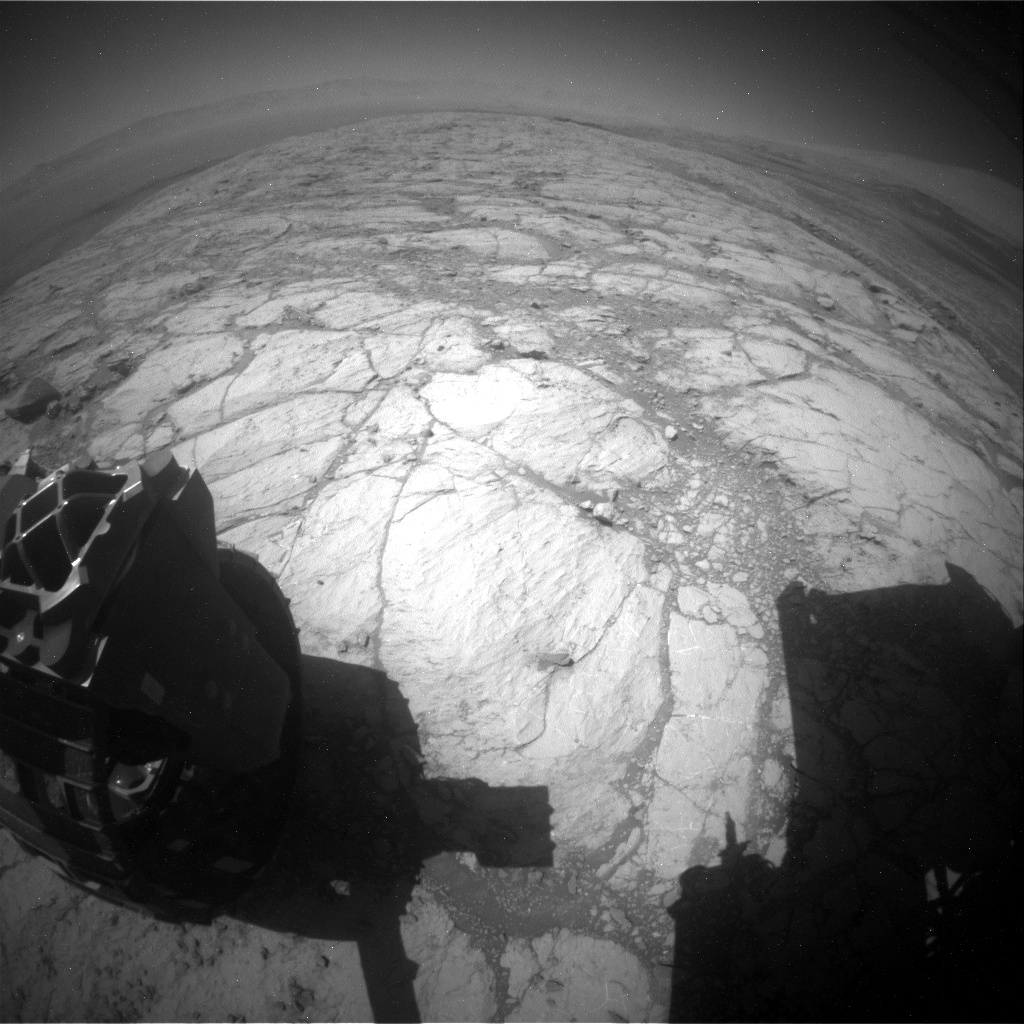

Image available for camera RHAZ onboard Curiosity rover


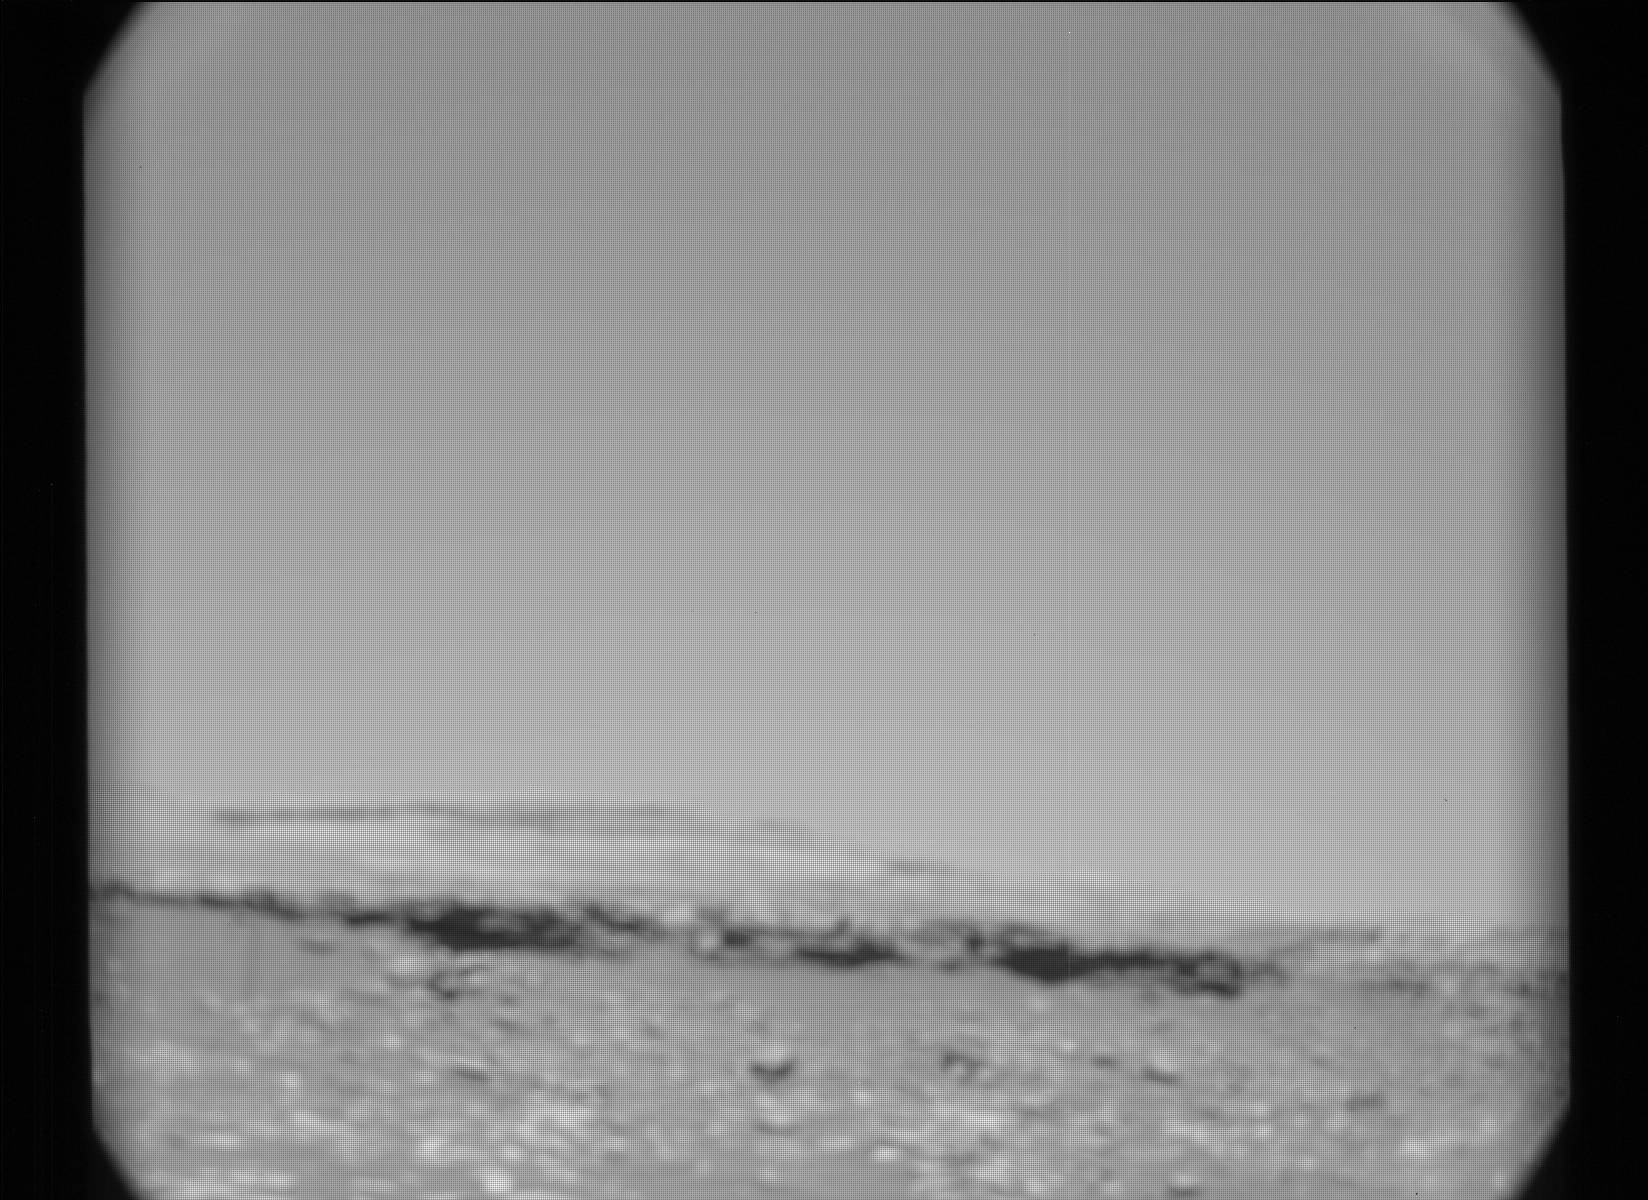

Image available for camera MAST onboard Curiosity rover


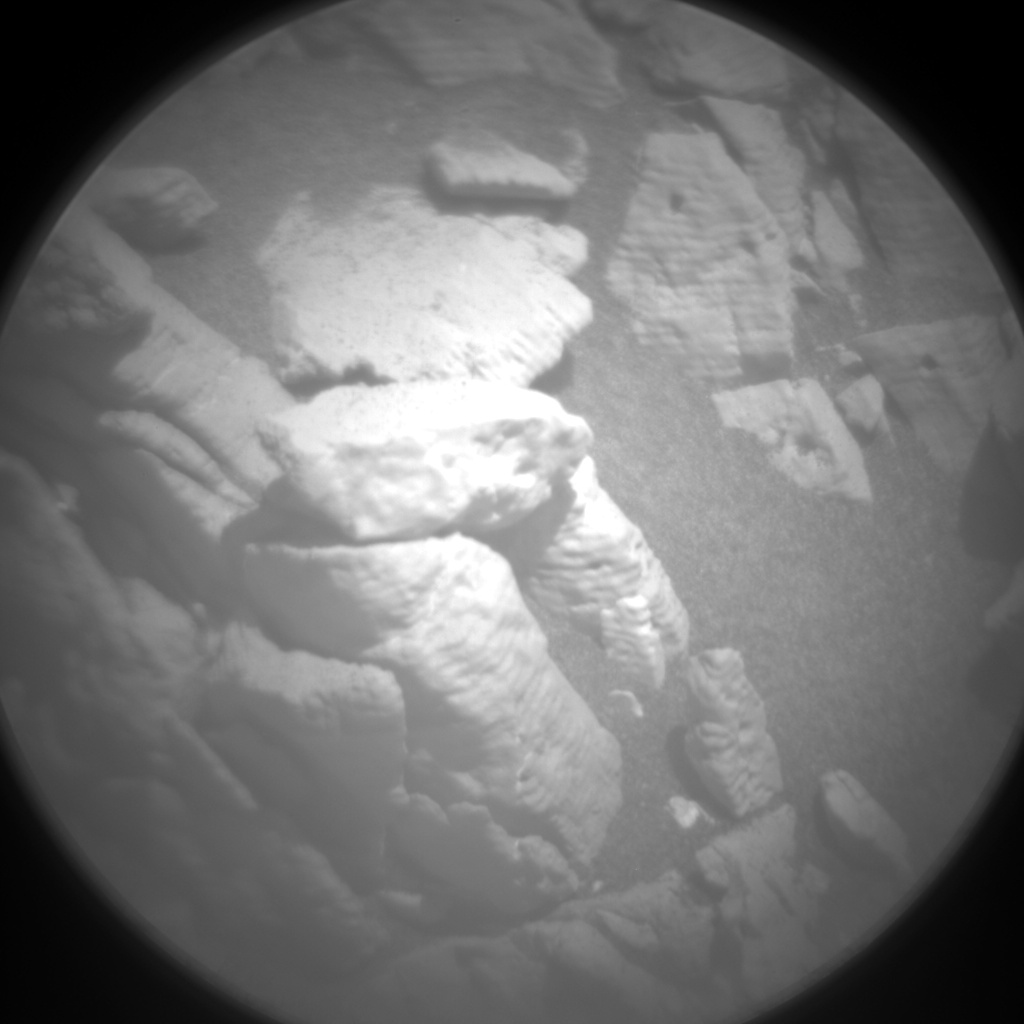

Image available for camera CHEMCAM onboard Curiosity rover


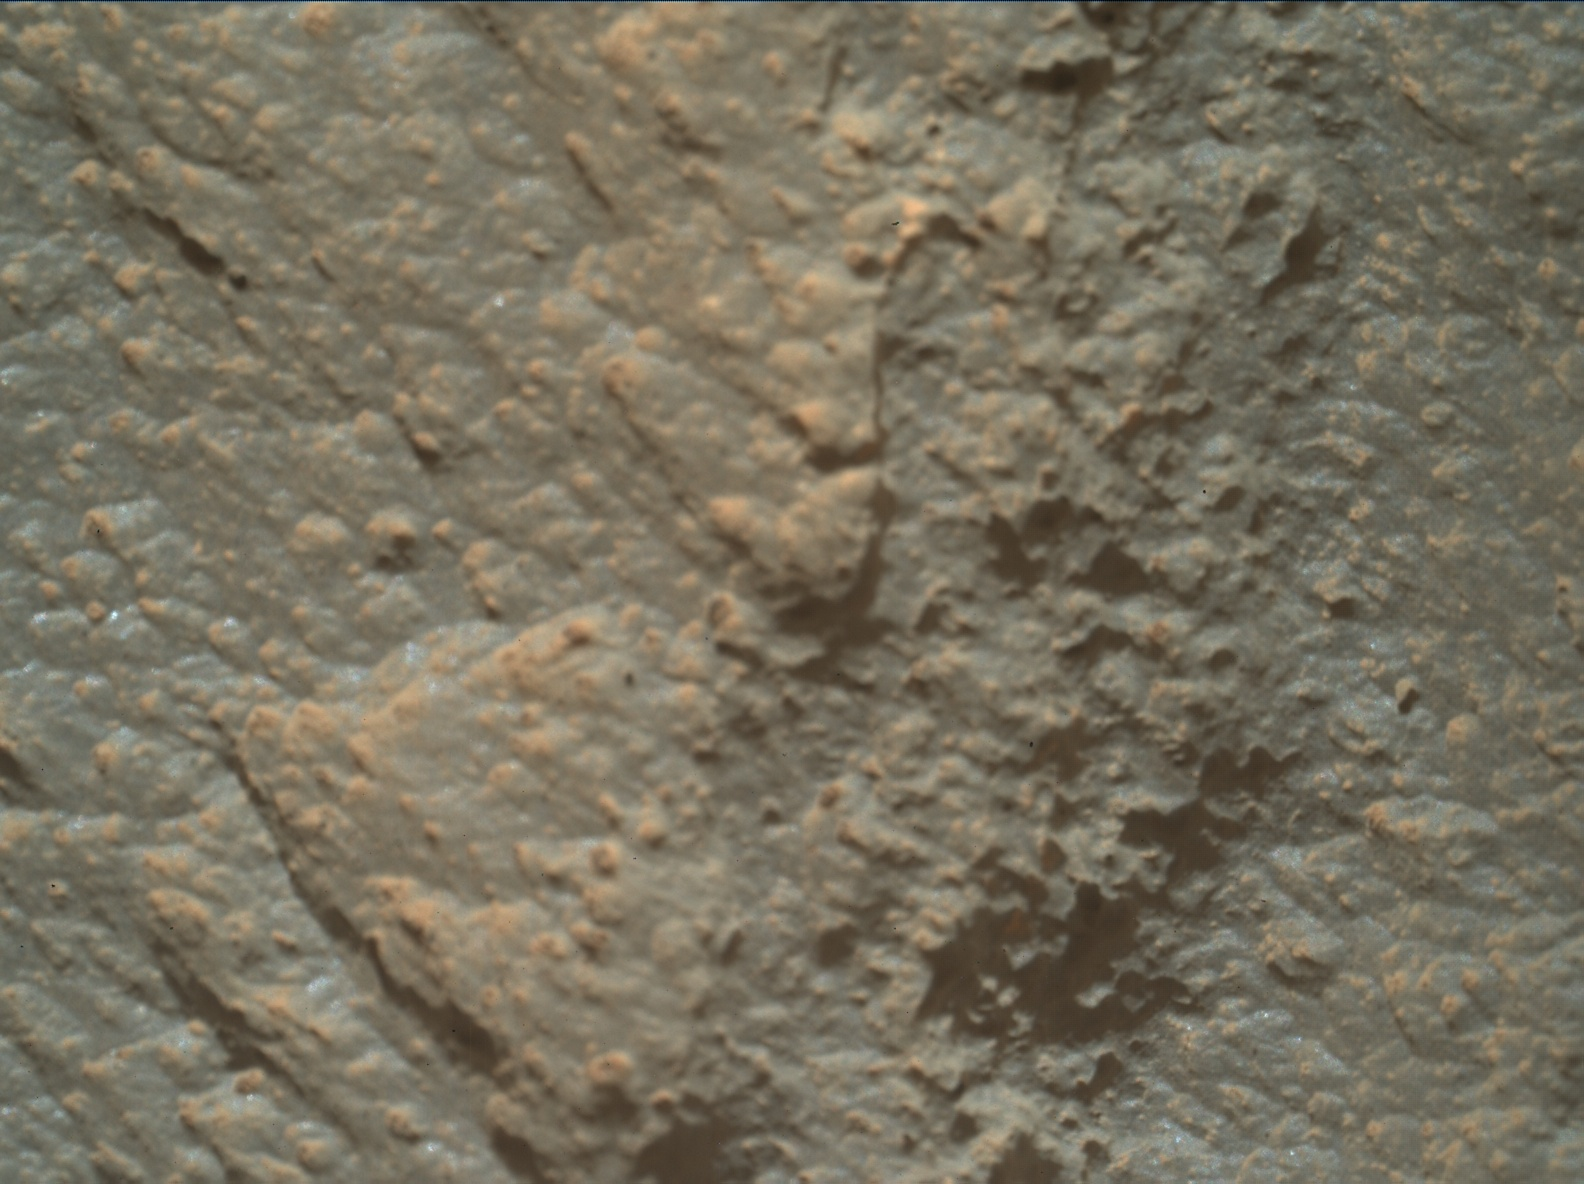

Image available for camera MAHLI onboard Curiosity rover
No image available on 2020-01-01 for camera MARDI onboard Curiosity rover, please select another date


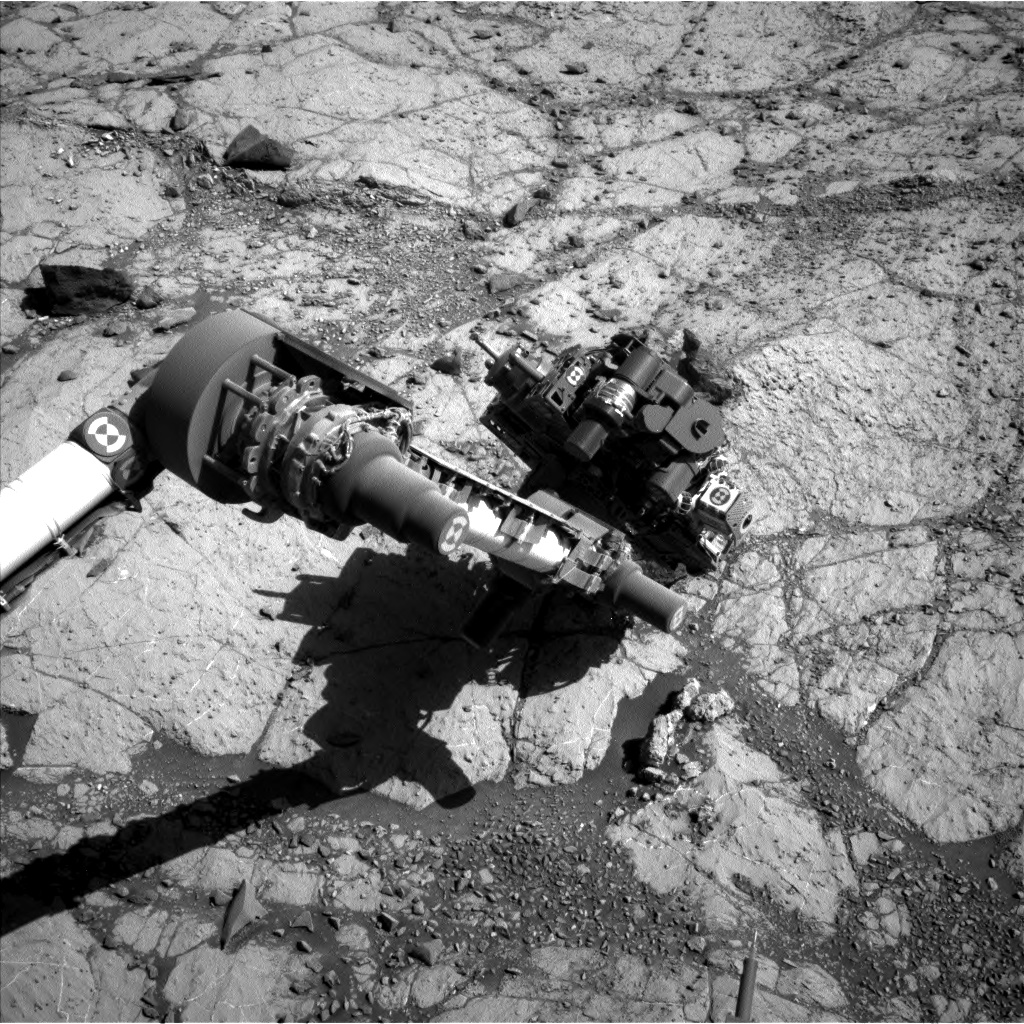

Image available for camera NAVCAM onboard Curiosity rover
No image available on 2020-01-01 for camera PANCAM onboard Curiosity rover, please select another date
No image available on 2020-01-01 for camera MINITES onboard Curiosity rover, please select another date


In [15]:
Mars_Today()

# Conclusions

Mars has shown us the effects of a planet with no atmosphere and high amounts of CO2 in its atmosphere. Temperature and pressure variates significantly due to the harsh atmospheric changes, including large heat waves and dust storms. Earth shows milder temperatures thanks to the atmospheric density and magnetosfere.

It is possible to predict the weather on Mars with pretty good results using basics statistics and rough methods. Nevertheless, with a good tool such as Machine Learning it could be possible to predict those values with more accuracy.